# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [284]:
#sat_csv = "/Users/chelen/Documents/ga/wk2/project-1/data/sat.csv"
#act_csv = "/Users/chelen/Documents/ga/wk2/project-1/data/act.csv"

import pandas as pd

sat_df = pd.read_csv(sat_csv)
act_df = pd.read_csv(act_csv)

#if we wanted to extract a variable in csv:
    #salary = ath['Total Pay'].values.tolist()

##### 2. Print the first ten rows of each dataframe.

In [285]:
print(sat_df[:10])
print(act_df[:10])

   Unnamed: 0                 State Participation  \
0           0               Alabama            5%   
1           1                Alaska           38%   
2           2               Arizona           30%   
3           3              Arkansas            3%   
4           4            California           53%   
5           5              Colorado           11%   
6           6           Connecticut          100%   
7           7              Delaware          100%   
8           8  District of Columbia          100%   
9           9               Florida           83%   

   Evidence-Based Reading and Writing  Math  Total  
0                                 593   572   1165  
1                                 547   533   1080  
2                                 563   553   1116  
3                                 614   594   1208  
4                                 531   524   1055  
5                                 606   595   1201  
6                                 530   512  

##### 3. Describe in words what each variable (column) is.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

##### 5. Print the types of each column.

In [286]:
print(sat_df.dtypes, '\n\n', act_df.dtypes)

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

 Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [287]:
#print(sat_df.dtypes)
    #should Unnamed be an int64? no
    #should State be a string? yes
    #should Participation be a string? no
    #should EBRW be an int64? yes
    #should Math be an int64? yes
    #should Total be an int64? yes

#fix Unnamed dtype
sat_df['Unnamed: 0'] = sat_df['Unnamed: 0'].astype('str')

#fix Participation dtype
#sat_df['Participation'].apply(lambda x: x.replace('%', '')).astype('float')/100
sat_df['Participation'] = [float(x.replace('%', ''))/100 for x in sat_df['Participation']]

#we need to set sat_df[<variable>].astype(<type>) here back to itself in order to save the new dtype
#sat_df['Participation'] = sat_df['Participation'].astype('float64')
#inplace defaults to False, although below didn't seem to work
    #sat['Unnamed: 0']=sat['Unnamed: 0'].astype('str', inplace = True)
    
print(sat_df.dtypes)

Unnamed: 0                             object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


In [288]:
#print(act_df.dtypes)
    #should Unnamed be an int64? no
    #should State be a str? yes
    #should Participation be an object? no
    #should English be a float64? yes
    #should Math be a float64? yes
    #should Reading be a float64? yes
    #should Science be a float64? yes
    #should Composite be a float64? yes

#fix Unnamed dtype
act_df['Unnamed: 0'] = act_df['Unnamed: 0'].astype('str')

#fix Participation dtype
act_df['Participation'] = [float(x.replace('%', ''))/100 for x in act_df['Participation']]
act_df['Participation'] = act_df['Participation'].astype('float64')
print(act_df.dtypes)

Unnamed: 0        object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [289]:
#sat

#can call a variable by sat_df[<variable>] OR by sat_df.variable
    #what is dict(zip(...)) doing?
    #test = dict(zip('1', '2'))
ebrw_dict = dict(zip(sat_df['State'], sat_df['Evidence-Based Reading and Writing']))
math_dict = dict(zip(sat_df['State'], sat_df['Math']))
total_dict = dict(zip(sat_df['State'], sat_df['Total']))

#ebrw_dict = sat_df.set_index('State')['Evidence-Based Reading and Writing'].to_dict()
#math_dict = sat_df.set_index('State')['Math'].to_dict()
#total_dict = sat_df.set_index('State')['Total'].to_dict()

#QUESTION: is there a .head()-esque function for dictionaries to return a preview?
#display(ebrw_dict)
#display(math_dict)
#display(total_dict)

In [290]:
#act

eng_dict = dict(zip(act_df['State'], act_df['English']))
mathact_dict = dict(zip(act_df['State'], act_df['Math']))
reading_dict = dict(zip(act_df['State'], act_df['Reading']))
science_dict = dict(zip(act_df['State'], act_df['Science']))
composite_dict = dict(zip(act_df['State'], act_df['Composite']))

#display(composite_dict)

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [291]:
#one_dict = { column_name: list of all column values }
    #one_dict = { [ebrw] : [ebrw_scores], [math] : [math_scores]... }
        
one_dict = {'participation_sat': list(sat_df['Participation']),
            'ebrw': list(sat_df['Evidence-Based Reading and Writing']),
            'math': list(sat_df['Math']),
            'total': list(sat_df['Total']),
            'participation_act': list(act_df['Participation']),
            'english': list(act_df['English']),
            'mathact': list(act_df['Math']),
            'reading': list(act_df['Reading']),
            'science': list(act_df['Science']),
            'composite': list(act_df['Composite'])
           }
#returns 51 b/c includes National average row
    #print(len(list(sat_df['Evidence-Based Reading and Writing'])))

one_dict.keys()

dict_keys(['participation_sat', 'ebrw', 'math', 'total', 'participation_act', 'english', 'mathact', 'reading', 'science', 'composite'])

##### 9. Merge the dataframes on the state column.

In [292]:
sat_df.set_index('Unnamed: 0', inplace = True)
act_df.set_index('Unnamed: 0', inplace = True)

In [293]:
print(sat_df.shape)
print(act_df.shape)

(51, 5)
(52, 7)


In [294]:
#changing inner to outer returns the extra row in act_df at the bottom, with NaN values for the SAT columns
merged_df = pd.merge(sat_df, act_df, how='inner', on='State')

display(merged_df.head())

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [295]:
#alternative
merged_df.rename(columns = {
                     'Unnamed: 0_x': 'index_sat',
                     'State': 'state',
                     'Participation_x': 'participation_sat',
                     'Evidence-Based Reading and Writing': 'ebrw_sat',
                     'Math_x': 'math_sat', 
                     'Total': 'total_sat', 
                     'Unnamed: 0_y': 'index_act',
                     'Participation_y': 'participation_act', 
                     'English': 'english_act', 
                     'Math_y': 'math_act',
                     'Reading': 'reading_act',
                     'Science': 'science_act',
                     'Composite': 'composite_act'
}, inplace = True)

merged_df.head()

,state,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [296]:
merged_df.head()

,state,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [297]:
#merged_df.columns = ['index_sat', 'state', 'participation_sat', 'ebrw_sat', 'math_sat', 'total_sat', 'index_act', 'participation_act', 'english_act', 'math_act', 'reading_act', 'science_act', 'composite_act']

display(merged_df.columns)
display(merged_df.dtypes)
#below works for replacing column values, not columns themselves
    #merged_df.replace('Test', 'Alabama')

Index(['state', 'participation_sat', 'ebrw_sat', 'math_sat', 'total_sat',
       'participation_act', 'english_act', 'math_act', 'reading_act',
       'science_act', 'composite_act'],
      dtype='object')

state                 object
participation_sat    float64
ebrw_sat               int64
math_sat               int64
total_sat              int64
participation_act    float64
english_act          float64
math_act             float64
reading_act          float64
science_act          float64
composite_act        float64
dtype: object

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [298]:
merged_df.describe()

,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [299]:
num_df = merged_df.select_dtypes(include = ('float64', 'int64'))
#print('numeric_columns_max: \n', num_df.max(), '\n\n', 'numeric_columns_min: \n', num_df.min())

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [300]:
import numpy as np
#num_df.head()

sd = []
[sd.append(num_df[i].std()) for i in num_df.columns]
display(sd)

[0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341]

In [301]:
#DISREGARD: scratch

#import numpy as np
#np.mean(merged_numeric_df['participation_sat'].values)
#merged_numeric_df.iloc[:3,0:1]
#display(one_dict.keys())

#manual looping
#sd = []
#for test in merged_numeric_df:
    #score_mean = np.mean(merged_numeric_df[test])
    #score = (merged_numeric_df[test])
    #subtracting 1 below because otherwise n counts header as a row
    #n = len(merged_numeric_df[test]) - 1
    #std = np.sqrt((sum((score - score_mean)**2) / n))
    #originally TypeError: 'builtin_function_or_method' object is not subscriptable b/c I was using [] instead of ()
        #was not calling the function the right way
    #sd.append(std)
    #print(test, score_mean, std)
    #QUESTION: why SyntaxError: 'return' outside function here?
    
#sd
    #QUESTION: how to get rid of National row in act_df?


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [302]:
#num_df.columns
num_df.loc[51, 'participation_sat':'composite_act'] = sd
num_df.tail(3)

/Users/chelen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
49,0.030000,642.000000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,0.030000,626.000000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [303]:
num_df.sort_values(['participation_sat'], ascending = False).head()

,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
22,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
29,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [304]:
mask = num_df['participation_sat'] > 0.5
num_df[mask].head()

,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
4,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
6,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [305]:
#del merged_numeric_df

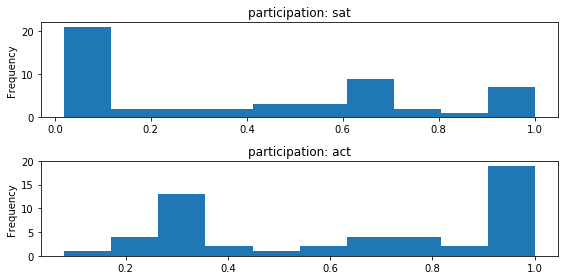

In [306]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8,4))

num_df['participation_sat'].plot(kind = 'hist', ax = ax[0], title = 'participation: sat');
num_df['participation_act'].plot(kind = 'hist', ax = ax[1], title = 'participation: act');

plt.tight_layout()

#QUESTION: below doesn't seem to take in ax / doesn't play well with subplots
#plt.hist(merged_numeric_df['participation_sat'], ax[0]);
#plt.hist(merged_numeric_df['participation_act'], title = 'participation: act');

##### 17. Plot the Math(s) distributions from both data sets.

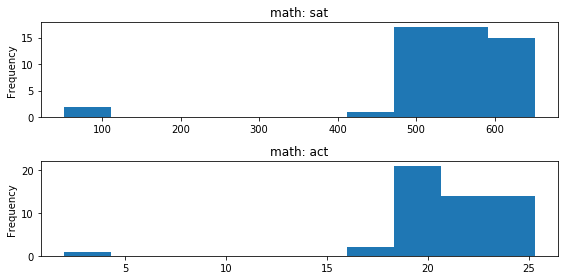

In [307]:
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8,4))

num_df['math_sat'].plot(kind = 'hist', ax = ax[0], title = 'math: sat');
num_df['math_act'].plot(kind = 'hist', ax = ax[1], title = 'math: act');

plt.tight_layout()

##### 18. Plot the Verbal distributions from both data sets.

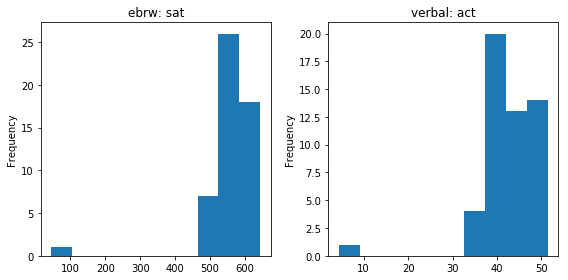

In [308]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

num_df['ebrw_sat'].plot(kind = 'hist', ax = ax[0], title = 'ebrw: sat');

#add reading and english act scores into new column: verbal_act
num_df['verbal_act'] = num_df['reading_act'] + num_df['english_act']
num_df['verbal_act'].plot(kind = 'hist', ax = ax[1], title = 'verbal: act');

plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Underlying assumption: our population data is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

ValueError: num must be 1 <= num <= 10, not 11

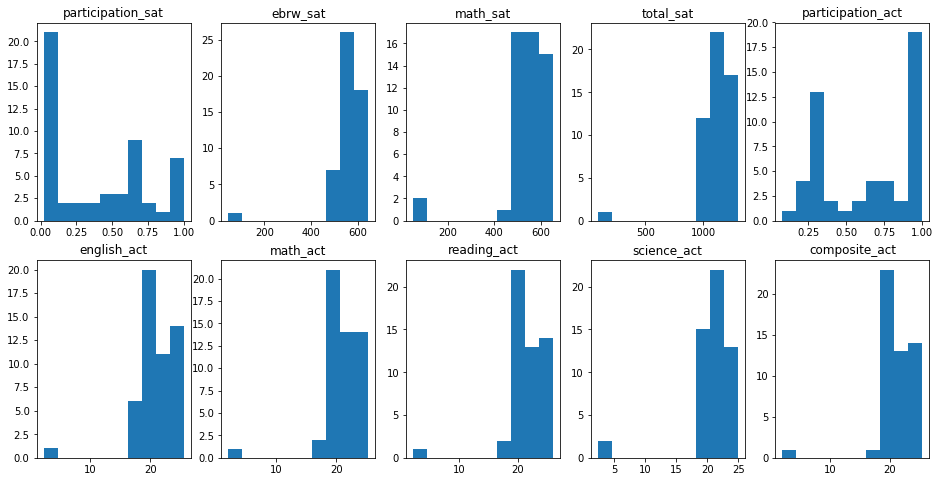

In [309]:
#Our data does not appear to be normally distributed looking at the plots.

fig = plt.figure(figsize = (16,8))

for i, col in enumerate(num_df.columns):
    fig.add_subplot(2, 5, 1+i)
    plt.hist(num_df[col])
    plt.title(col);

#how does defining fig outside of the for loop affect the plot?
#how does defining fig inside of the for loop affect the plot?
#how does defining fig outside + subplots inside affect the plot?
    #need another variable for plot positioning
#how to return multiple plots per variable?

#plt.hist([i for i in num_df[col]])

In [ ]:
#QUESTION: Why do we specify location by ax for subplots here but with plt.add_subplot we can input one number to indicate the position?

#import matplotlib.pyplot as plt
#figure, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (12,10))

#num_df['participation_sat'].plot(kind = 'hist', ax = ax[0,0], title = 'participation_sat');
#num_df['ebrw_sat'].plot(kind = 'hist', ax = ax[0,1], title = 'ebrw_sat');
#num_df['math_sat'].plot(kind = 'hist', ax = ax[0,2], title = 'math_sat');
#num_df['total_sat'].plot(kind = 'hist', ax = ax[0,3], title = 'total_sat');
#num_df['participation_act'].plot(kind = 'hist', ax = ax[1,0], title = 'participation_act');
#num_df['english_act'].plot(kind = 'hist', ax = ax[1,1], title = 'participation_sat');
#num_df['math_act'].plot(kind = 'hist', ax = ax[1,2], title = 'math_act');
#num_df['reading_act'].plot(kind = 'hist', ax = ax[1,3], title = 'reading_act');
#num_df['science_act'].plot(kind = 'hist', ax = ax[1,4], title = 'science_act');
#num_df['composite_act'].plot(kind = 'hist', ax = ax[1,5], title = 'composite_act');

#plt.tight_layout()

##### 21. Plot some scatterplots examining relationships between all variables.

In [ ]:
for i, col in enumerate(num_df.columns):
    fig = plt.figure(figsize = (20,20))
    for j, coltwo in enumerate(num_df.columns):
        fig.add_subplot(5, 5, 1+j)
        plt.scatter(x = num_df[col], y = num_df[coltwo])
        plt.title(str(col).upper()+(' x ')+str(coltwo).upper());

In [ ]:
#figure, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5))

#num_df.plot.scatter('ebrw_sat','math_sat', ax = ax[0,0]);
#num_df.plot.scatter('ebrw_sat','total_sat', ax = ax[0,1]);
#num_df.plot.scatter('participation_sat','total_sat', ax = ax[0,2]);

#num_df.plot.scatter('reading_act','math_act', ax = ax[1,0]);
#num_df.plot.scatter('math_act', 'science_act', ax = ax[1,1]);
#num_df.plot.scatter('participation_act','composite_act', ax = ax[1,2]);

##### 22. Are there any interesting relationships to note?

The participation rates tend to be lower for the highest total SAT / composite ACT scores. This may point to (self) selection bias: those who sign up to take the tests are high performing students.

##### 23. Create box plots for each variable. 

In [ ]:
fig = plt.figure(figsize = (20,14))

for i, col in enumerate(num_df.columns):
    fig.add_subplot(3, 4, 1+i)
    plt.boxplot(num_df[col])
    plt.title(col);
    

In [ ]:
#figure, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (16,12))

#num_df.boxplot('participation_sat', ax = ax[0,0]);
#num_df.boxplot('ebrw_sat', ax = ax[0,1]);
#num_df.boxplot('math_sat', ax = ax[0,2]);
#num_df.boxplot('total_sat', ax = ax[0,3]);
#num_df.boxplot('participation_act', ax = ax[1,0]);
#num_df.boxplot('english_act', ax = ax[1,1]);
#num_df.boxplot('reading_act', ax = ax[1,2]);
#num_df.boxplot('math_act', ax = ax[1,3]);
#num_df.boxplot('science_act', ax = ax[1,4]);
#num_df.boxplot('composite_act', ax = ax[1,5]);
#num_df.boxplot('verbal_act', ax = ax[0,5]);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
import scipy.stats as stats
from scipy.stats import skew
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#shape, center, spread

#row 51 = sd
#adding row 52 for mean
num_df.loc[52, 'participation_sat': 'verbal_act'] = [num_df[i].mean() for i in num_df.columns]

#adding row 53 for median
num_df.loc[53, 'participation_sat': 'verbal_act'] = [num_df[i].median() for i in num_df.columns]

#adding row 54 for range
num_df.loc[54, 'participation_sat': 'verbal_act'] = [num_df[i].max() - num_df[i].min() for i in num_df.columns]

#adding row 55 for skew
num_df.loc[55, 'participation_sat': 'verbal_act'] = [skew(num_df[i]) for i in num_df.columns]
num_df.tail()

#QUESTION: to add in how many outliers (test-statistic outside of 3 std deviations away from the norm) in each column?
    #stats.norm.pdf

Participation rate for the SAT is skewed slightly right (positive, multi-modal), EBRW/Math and Total SAT scores are skewed left (negative).

Participation rate for the ACT is skewed slightly left (positive, bimodal in plot), all portions of ACT scores are skewed left (negative).

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
#Step 1. Set null and alternate hypotheses
#Null: There is no difference between SAT and ACT participation rates on average.
#Alternate: There is a difference between SAT and ACT participation rates on average.

In [ ]:
#Step 2. Set alpha - given
a = 0.05

In [ ]:
#Step 3. Calculate point estimate
sat_mean = np.mean(merged_df['participation_sat'])
act_mean = np.mean(merged_df['participation_act'])
print('sat_mean: ', sat_mean, ', act_mean: ', act_mean, ', point_estimate: ', sat_mean - act_mean)

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [ ]:
#Step 4. Calculate a t-statistic
#manual attempt
numer = sat_mean - act_mean
denom = np.sqrt((np.var(merged_df['participation_sat']) / (len(merged_df['participation_sat'])-1)) + (np.var(merged_df['participation_act']) / (len(merged_df['participation_act'])-1)))
t = numer / denom
print('t-statistic: ', t)

#with function
result = stats.ttest_ind(merged_df['participation_sat'], merged_df['participation_act'])

In [ ]:
#visualization of a normal distribution
xpoints = np.linspace(-4,4,500)
ypoints = stats.t.pdf(xpoints, (len(merged_df['participation_sat'])+len(merged_df['participation_act'])-2))

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
ax.plot(xpoints, ypoints);

#showing our t-statistic as a reference line
ax.axvline(t, color = 'black', linestyle = '--');

In [ ]:
#Step 5. Calculate p-value and interpret conclusion
#manual
lower_tail = stats.t.cdf(-abs(t), len(merged_df['participation_sat'])+len(merged_df['participation_act'])-2)
upper_tail = 1 - stats.t.cdf(abs(t), len(merged_df['participation_sat'])+len(merged_df['participation_act'])-2)
p = lower_tail + upper_tail
print('p-value: ', p)

#with function
result = stats.ttest_ind(merged_df['participation_sat'], merged_df['participation_act'])

Our p-value of 0.0002 is less than our alpha of 0.05: we find it extremely unlikely that the true population difference between all SAT and ACT mean participation rates is 0 is extremely small. We reject our null hypothesis - it is likely that SAT and ACT mean participation rates differ.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [317]:
#manual

#for 95% CI
z=1.96
#for 99.5% CI
#z=2.575

sat_mean = np.mean(merged_df['participation_sat'])
sat_sem = (np.std(merged_df['participation_sat']) / np.sqrt(len(merged_df['participation_sat'])))
sat_ci_lower = sat_mean - z*sat_sem
sat_ci_upper = sat_mean + z*sat_sem
print('sat_'+str(z)+'ci: ', sat_ci_lower, ',', sat_ci_upper)

act_mean = np.mean(merged_df['participation_act'])
act_sem = (np.std(merged_df['participation_act']) / np.sqrt(len(merged_df['participation_act'])))

act_ci_lower = act_mean - z*act_sem
act_ci_upper = act_mean + z*act_sem
print('act_'+str(z)+'ci: ', act_ci_lower, ',', act_ci_upper)

#function
import scipy.stats as stats
sat_ci = stats.norm.interval(0.95, loc= np.mean(merged_df['participation_sat']), scale= stats.sem(merged_df['participation_sat']))
act_ci = stats.norm.interval(0.95, loc= np.mean(merged_df['participation_act']), scale= stats.sem(merged_df['participation_act']))
#print ('sat_ci: ', sat_ci, '\n', 'act_ci: ', act_ci)

sat_1.96ci:  0.30217467067592396 , 0.4939037606966251
act_1.96ci:  0.5652060109975313 , 0.7398920282181548


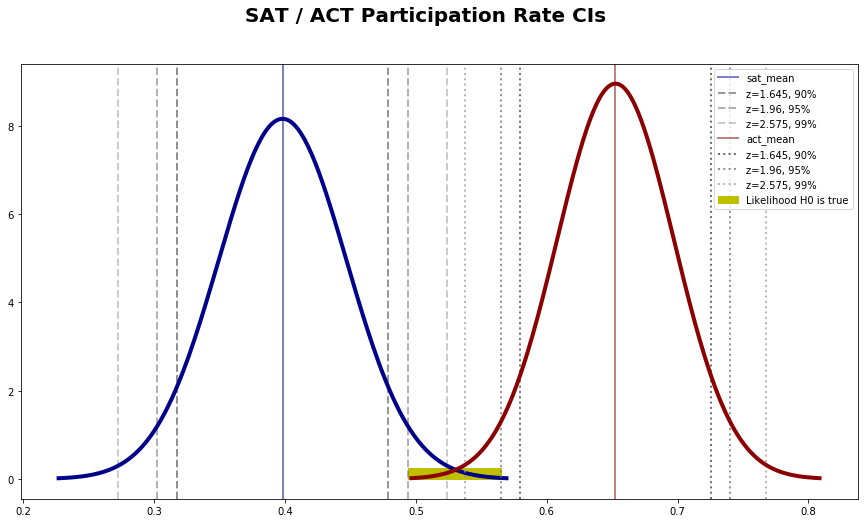

In [411]:
# Initialize a matplotlib "figure:" for SAT participation rates:
fig = plt.figure(figsize=(15,8))
#fill area under overlapping curves: represents likelihood H0 of no mean difference in tests is true
plt.fill_between(x = (sat_ci_upper, act_ci_lower), y1 = (0.25, 0.25), where = True, color = 'y', label = 'Likelihood H0 is true')
ax = fig.gca()

zx = np.linspace(sat_mean-3.5*sat_sem, sat_mean+3.5*sat_sem, 250)

Z = stats.norm(sat_mean, sat_sem)
zy = Z.pdf(zx)

#sat_mean
ax.axvline(sat_mean, ls='solid', lw=2, color='darkblue', alpha=0.5, label='sat_mean')

# 90%:
ax.axvline(sat_mean-1.645*sat_sem, ls='dashed', lw=2, color='#222222', alpha=0.5)
ax.axvline(sat_mean+1.645*sat_sem, ls='dashed', lw=2, color='#333333', alpha=0.5, label='z=1.645, 90%')

# 95%:
ax.axvline(sat_mean-1.96*sat_sem, ls='dashed', lw=2, color='#666666', alpha=0.5)
ax.axvline(sat_mean+1.96*sat_sem, ls='dashed', lw=2, color='#666666', alpha=0.5, label='z=1.96, 95%')

# 99%:
ax.axvline(sat_mean-2.575*sat_sem, ls='dashed', lw=2, color='#999999', alpha=0.5)
ax.axvline(sat_mean+2.575*sat_sem, ls='dashed', lw=2, color='#999999', alpha=0.5, label='z=2.575, 99%')

ax.plot(zx, zy, linewidth=4, color='darkblue')
ax.legend(loc='upper left')

################################################################
# Initialize a matplotlib "figure:" for ACT participation rates:

#for separate plots
#fig2 = plt.figure(figsize=(10,5))
    #ax2 = fig2.gca()
ax2 = fig.gca()

zx2 = np.linspace(act_mean-3.5*act_sem, act_mean+3.5*act_sem, 250)

Z = stats.norm(act_mean, act_sem)
zy2 = Z.pdf(zx2)

#act_mean
ax.axvline(act_mean, ls='solid', lw=2, color='darkred', alpha=0.5, label='act_mean')

# 90%:
ax2.axvline(act_mean-1.645*act_sem, ls='dotted', lw=2, color='#333333', alpha=0.7)
ax2.axvline(act_mean+1.645*act_sem, ls='dotted', lw=2, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax2.axvline(act_mean-1.96*act_sem, ls='dotted', lw=2, color='#666666', alpha=0.7)
ax2.axvline(act_mean+1.96*act_sem, ls='dotted', lw=2, color='#666666', alpha=0.7, label='z=1.96, 95%')

# 99%:
ax2.axvline(act_mean-2.575*act_sem, ls='dotted', lw=2, color='#999999', alpha=0.7)
ax2.axvline(act_mean+2.575*act_sem, ls='dotted', lw=2, color='#999999', alpha=0.7, label='z=2.575, 99%')

ax2.plot(zx2, zy2, linewidth=4, color='darkred')
ax2.legend(loc='upper right')

################################################################
fig.suptitle('SAT / ACT Participation Rate CIs', fontsize = 20, weight = 'bold');

Interpretation: Given our p-value is so small, we would expect to see the 95% confidence intervals of SAT and ACT mean participation rates not to overlap much. The 95% CIs do not overlap at all - the likelihood that the mean participation rates for the two tests are similar is very small.

If we calculate a 99.5% confidence interval, we see that there is slight overlap between the two test means: sat_ci_upper_tail is 53.7% and act_ci_lower_tail is 52.6%. The range between 52.6% and 53.7% is 1.1%. Only in extreme outlier cases would the SAT and ACT mean participation rates show little difference.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, 27 confirms our interpretation in 26 - it is unlikely that the two participation rates are similar because a small p-value gives us confidence to reject the null, and we saw with the two CIs more evidence that the chance of the null hypothesis being true is very small (visually the area under the two 99.5% CIs that overlap is the probability of the null holding true).

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [56]:
math_corr = np.corrcoef(merged_df['math_sat'], merged_df['math_act'])
merged_df.loc[:, ['math_sat', 'math_act']].corr()

,math_sat,math_act
math_sat,1.000000,-0.340906
math_act,-0.340906,1.000000


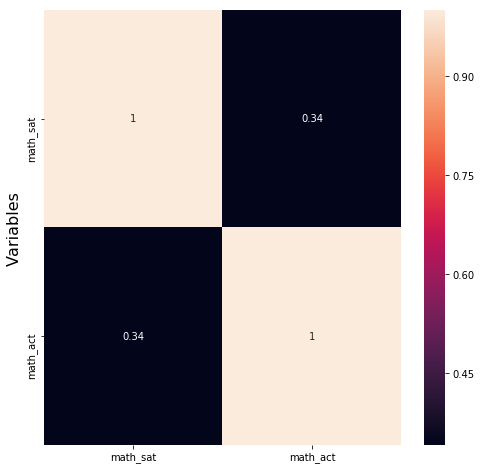

In [416]:
import seaborn as sns

#for math scores
fig = plt.figure(figsize = (8,8))
ax=fig.gca()

sns.heatmap(np.abs(merged_df.loc[:, ['math_sat', 'math_act']].corr()), annot = True, ax=ax);
ax.set_ylabel('Variables', fontsize = 16);

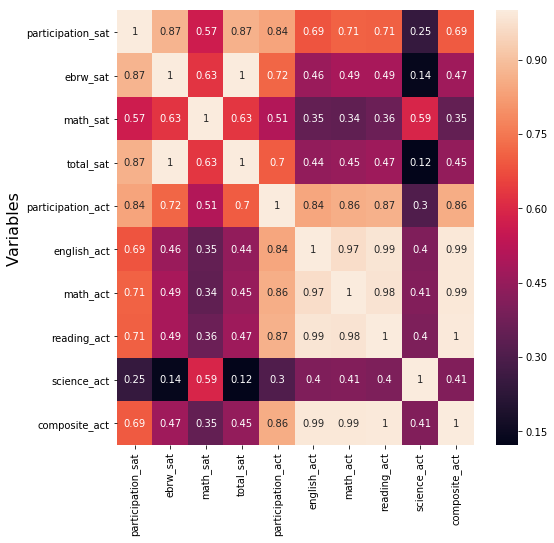

In [414]:
#for all variables
fig = plt.figure(figsize = (8,8))
ax=fig.gca()

sns.heatmap(np.abs(merged_df.corr()), annot = True, ax=ax);
ax.set_ylabel('Variables', fontsize = 16);

Correlation here may make sense if there is significant overlap between students who take both the SAT and the ACT. For this group, if we see high math scores on the SAT, we would expect high math scores on the ACT. However, we'd need to subset the data to only represent this conditional group - otherwise the correlation is too noisy. If we are able to subset, the correlation would tell us whether our expectation is true: the closer r is to +1, the stronger the relationship between math scores on both tests.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No, because in that case our population is 2017, so we can calculate the true population statistics and do not need to infer. Our inference extends to the true population mean for understanding the relationship between SAT and ACT data beyond the year of 2017.